In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.io
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

In [2]:
mean_1 = 5
mean_2_set = [7, 9, 11] 
mean_3 = 9
mean_4 = 11

variance = 4
st_dev = 2

In [3]:
def calculate_probability_fa_h(x_star, mean_1, mean_2, st_dev):
    # probability of incorrectly classifying an object from class w1 as class w2 when x >= x*
    p_fa = 1 - norm.cdf(x_star, loc=mean_1, scale=st_dev)
    p_h = 1 - norm.cdf(x_star, loc=mean_2, scale=st_dev)
    return p_fa, p_h

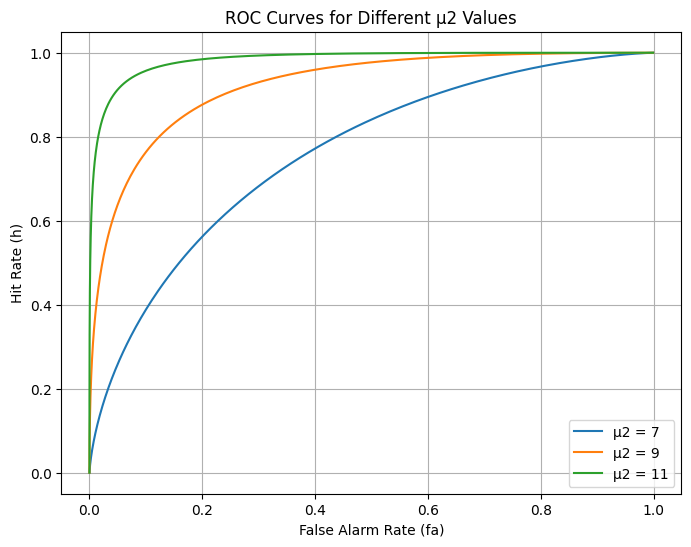

In [4]:
# Plot ROC curves for each mean_2 value
plt.figure(figsize=(8, 6))

for mean_2 in mean_2_set:

    x_star_values = np.linspace(mean_1 - 3 * st_dev, mean_2 + 3 * st_dev, 500) # [-1 ,13]
    fa_values = []
    h_values = []

    # Calculate fa and h for each x*
    for x_star in x_star_values:
        fa, h = calculate_probability_fa_h(x_star, mean_1, mean_2, st_dev)
        fa_values.append(fa)
        h_values.append(h)

    # Plot ROC for the current mean_2 value
    plt.plot(fa_values, h_values, linestyle='-', label=f'µ2 = {mean_2}')
    
plt.xlabel('False Alarm Rate (fa)')
plt.ylabel('Hit Rate (h)')
plt.title('ROC Curves for Different µ2 Values')
plt.grid(True)
plt.legend()


plt.show()

In [5]:
for mean_2 in mean_2_set:
    d_prime = abs(mean_2 - mean_1) / st_dev
    print(f"d' for µ2 =  {d_prime}")

d' for µ2 =  1.0
d' for µ2 =  2.0
d' for µ2 =  3.0


In [6]:
data_binary = scipy.io.loadmat('task_7.mat')
print(data_binary.keys())

outcomes = data_binary['outcomes']

df_binary= pd.DataFrame(data=outcomes)
print(df_binary)

dict_keys(['__header__', '__version__', '__globals__', 'outcomes'])
     0  1
0    0  0
1    1  1
2    0  0
3    1  1
4    1  1
..  .. ..
195  1  1
196  0  0
197  1  0
198  1  0
199  0  0

[200 rows x 2 columns]


In [7]:
# Calculate TP, FP , FN, TN

TP = np.sum((outcomes[:, 0] == 1) & (outcomes[:, 1] == 1))
FP = np.sum((outcomes[:, 0] == 0) & (outcomes[:, 1] == 1))
FN = np.sum((outcomes[:, 0] == 1) & (outcomes[:, 1] == 0))
TN = np.sum((outcomes[:, 0] == 0) & (outcomes[:, 1] == 0))

hit_rate = TP / (TP + FN)
fa_rate = FP / (FP + TN)

print("hit rate: ", hit_rate)
print("false alarm rate: ", fa_rate)


hit rate:  0.8
false alarm rate:  0.1


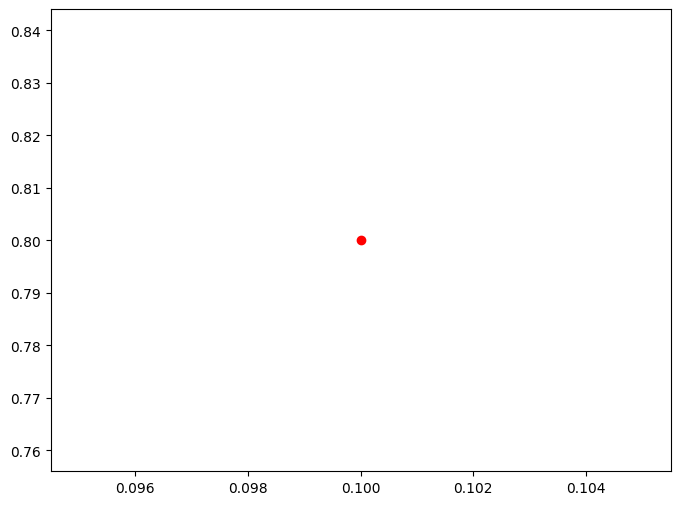

In [8]:
# Plotting the point (fa, h)
plt.figure(figsize=(8, 6))
plt.plot(fa_rate, hit_rate, 'ro')

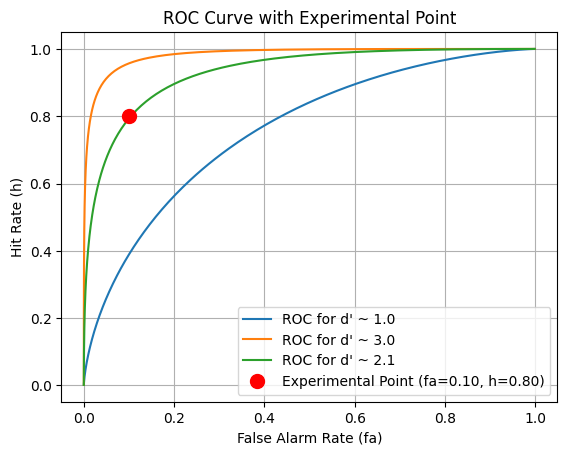

In [9]:
# artificial ROC curves for different values of d0

mean_1 = 0
st_dev = 1 
mean_2_set = [1, 3, 2.1] # trying different combinations of d' = (mean_2 - mean_1) / st_dev

for mean_2 in mean_2_set:

    x_star_values = np.linspace(mean_1 - 3 * st_dev, mean_2 + 3 * st_dev, 500) # [-1 ,13]
    fa_values = []
    h_values = []

    # Calculate fa and h for each x*
    for x_star in x_star_values:
        fa, h = calculate_probability_fa_h(x_star, mean_1, mean_2, st_dev)
        fa_values.append(fa)
        h_values.append(h)

    # Plot ROC curve for the currenFt d'
    plt.plot(fa_values, h_values, label=f'ROC for d\' ~ {abs(mean_2 - mean_1) / st_dev}')

# Plot the experimental point (fa_rate, hit_rate) in red
plt.plot(fa_rate, hit_rate, 'ro', markersize=10, label=f'Experimental Point (fa={fa_rate:.2f}, h={hit_rate:.2f})')

plt.xlabel('False Alarm Rate (fa)')
plt.ylabel('Hit Rate (h)')
plt.title('ROC Curve with Experimental Point')
plt.grid(True)
plt.legend()
plt.show()
